# IMPORTAR BIBLIOTECAS E BASES DE DADOS

In [1]:
pip install tensorflow

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install plotly
!pip3 install --upgrade nbformat
!pip3 install nltk
!pip3 install spacy 
!pip3 install wordcloud
!pip3 install gensim 
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn


import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Requirement already up-to-date: nbformat in /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages (5.0.8)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
You should conside

In [25]:
!pip3 install xlrd
df_tweet = pd.read_excel('Base_tweets_saúde_Aos_Fatos.xlsx')

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [42]:
df_tweet.head()

,Unnamed: 0,index,id,conversation_id,created_at,date,time,timezone,user_id,username,...,likes_count,hashtags,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,popularidade
0,554951,283,1241901045623726083,1241901045623726083,1584927257000,2020-03-22,22:34:17,Hora oficial do Brasil,1203191076066082816,rafauccman,...,163235,[],https://twitter.com/rafauccman/status/12419010...,False,NaN,NaN,NaN,NaN,"[{'user_id': '1203191076066082816', 'username'...",191494
1,642426,3732,1248204903387930626,1248204903387930626,1586430214000,2020-04-09,08:03:34,Hora oficial do Brasil,128372940,jairbolsonaro,...,74040,[],https://twitter.com/jairbolsonaro/status/12482...,False,NaN,NaN,NaN,NaN,"[{'user_id': '128372940', 'username': 'jairbol...",87239
2,636298,7995,1247841684584640512,1247841684584640512,1586343616000,2020-04-08,08:00:16,Hora oficial do Brasil,128372940,jairbolsonaro,...,72280,[],https://twitter.com/jairbolsonaro/status/12478...,False,NaN,NaN,NaN,NaN,"[{'user_id': '128372940', 'username': 'jairbol...",86922
3,104383,1965,1243169243589476353,1243169243589476353,1585229619000,2020-03-26,10:33:39,Hora oficial do Brasil,128372940,jairbolsonaro,...,67383,[],https://twitter.com/jairbolsonaro/status/12431...,False,NaN,NaN,NaN,NaN,"[{'user_id': '128372940', 'username': 'jairbol...",78428
4,622000,7550,1247543319665602560,1247543319665602560,1586272480000,2020-04-07,12:14:40,Hora oficial do Brasil,1163562471854133250,gen_heleno,...,62535,[],https://twitter.com/gen_heleno/status/12475433...,False,NaN,NaN,NaN,NaN,"[{'user_id': '1163562471854133250', 'username'...",75781


In [43]:
df = pd.concat(pd.read_excel('Base_tweets_saúde_Aos_Fatos.xlsx', sheet_name=None), ignore_index=True)
df.head(5)

,Unnamed: 0,index,id,conversation_id,created_at,date,time,timezone,user_id,username,...,link,retweet,quote_url,user_rt_id,user_rt,retweet_id,reply_to,popularidade,desinfo,z
0,554951.0,283,1241901045623726083,1241901045623726083,1584927257000,2020-03-22 00:00:00,22:34:17,Hora oficial do Brasil,1203191076066082816,rafauccman,...,https://twitter.com/rafauccman/status/12419010...,False,NaN,NaN,NaN,NaN,"[{'user_id': '1203191076066082816', 'username'...",191494,NaN,NaN
1,642426.0,3732,1248204903387930626,1248204903387930626,1586430214000,2020-04-09 00:00:00,08:03:34,Hora oficial do Brasil,128372940,jairbolsonaro,...,https://twitter.com/jairbolsonaro/status/12482...,False,NaN,NaN,NaN,NaN,"[{'user_id': '128372940', 'username': 'jairbol...",87239,NaN,NaN
2,636298.0,7995,1247841684584640512,1247841684584640512,1586343616000,2020-04-08 00:00:00,08:00:16,Hora oficial do Brasil,128372940,jairbolsonaro,...,https://twitter.com/jairbolsonaro/status/12478...,False,NaN,NaN,NaN,NaN,"[{'user_id': '128372940', 'username': 'jairbol...",86922,NaN,NaN
3,104383.0,1965,1243169243589476353,1243169243589476353,1585229619000,2020-03-26 00:00:00,10:33:39,Hora oficial do Brasil,128372940,jairbolsonaro,...,https://twitter.com/jairbolsonaro/status/12431...,False,NaN,NaN,NaN,NaN,"[{'user_id': '128372940', 'username': 'jairbol...",78428,NaN,NaN
4,622000.0,7550,1247543319665602560,1247543319665602560,1586272480000,2020-04-07 00:00:00,12:14:40,Hora oficial do Brasil,1163562471854133250,gen_heleno,...,https://twitter.com/gen_heleno/status/12475433...,False,NaN,NaN,NaN,NaN,"[{'user_id': '1163562471854133250', 'username'...",75781,NaN,NaN


In [44]:
df.isna().sum() #verificar se existem valores nulos

Unnamed: 0          1995
index                  0
id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
tweet                  0
categoria          11388
desinf             11965
mentions               1
urls                   0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
link                   0
retweet                0
quote_url          11252
user_rt_id         11988
user_rt            11988
retweet_id         11988
reply_to               0
popularidade           0
desinfo            11855
z                   9993
dtype: int64

# REALIZAR ANÁLISE EXPLORATÓRIA DOS DADOS

In [45]:
df_t = df[df['desinf'].str.contains("desinf", na=False)]
df_t.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 2 to 98
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       21 non-null     float64
 1   index            21 non-null     int64  
 2   id               21 non-null     int64  
 3   conversation_id  21 non-null     int64  
 4   created_at       21 non-null     int64  
 5   date             21 non-null     object 
 6   time             21 non-null     object 
 7   timezone         21 non-null     object 
 8   user_id          21 non-null     int64  
 9   username         21 non-null     object 
 10  name             21 non-null     object 
 11  tweet            21 non-null     object 
 12  categoria        21 non-null     object 
 13  desinf           21 non-null     object 
 14  mentions         21 non-null     object 
 15  urls             21 non-null     object 
 16  replies_count    21 non-null     int64  
 17  retweets_count   2

In [8]:
fake['rotulo'] = 0
fake.head()

,title,text,subject,date,rotulo
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
# Join
df = pd.concat([true, fake]).reset_index(drop = True)

In [10]:
df.drop(columns = ['date'], inplace = True)

In [11]:
# Combinar titulo e texto
df['News'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,rotulo,News
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


In [12]:
df['News'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

# #REALIZAR LIMPEZA E TRANSFORMAÇÃO DOS DADOS

In [14]:
ps = PorterStemmer() 
corpus = []
for i in range(0, len(df.News)):
    review = re.sub('[^a-zA-Z]', ' ', df.News[i]) #Removendo tudo exceto a-z and A-Z e caracteres especiais
    review = review.lower() ## Convertendo tudo para caixa baixa
    review = review.split() ##  Spliting 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] ##Removendo stop words i.e is ,or ,and etc
    review = ' '.join(review) ## joining 
    corpus.append(review) 
    corpus

In [15]:
from sklearn.feature_extraction.text import CountVectorizer #Vetorizar
vectorizer = CountVectorizer(max_features = 5000, ngram_range=(1,3)) 
bag = vectorizer.fit_transform(corpus).toarray() 


In [16]:
pickle.dump(vectorizer, open("vector.pickle", "wb")) # Salvando para o aplicativo

In [17]:
y= df.rotulo
y

0       1
1       1
2       1
3       1
4       1
       ..
3995    0
3996    0
3997    0
3998    0
3999    0
Name: rotulo, Length: 4000, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bag, y, test_size = 0.2, random_state =0)

# #Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
NaiveB=MultinomialNB(alpha=0.7) 
NaiveB.fit(X_train, y_train)
y_naive = NaiveB.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

accuracy = accuracy_score(y_test, y_naive) # Dentre todas as classificações, quantas o modelo classificou corretamente? 
precision = precision_score(y_test, y_naive) # Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas
recall = recall_score(y_test, y_naive) #  dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas

f1 = f1_score(y_test, y_naive) # média harmônica entre precisão e recall

print("Model Accuracy : ", accuracy)
print("Model Precision : ", precision)
print("Model Recall : ", recall)
print("Model F1 Score : ", f1)

Model Accuracy :  0.99125
Model Precision :  0.9901960784313726
Model Recall :  0.9926289926289926
Model F1 Score :  0.9914110429447853


<AxesSubplot:>

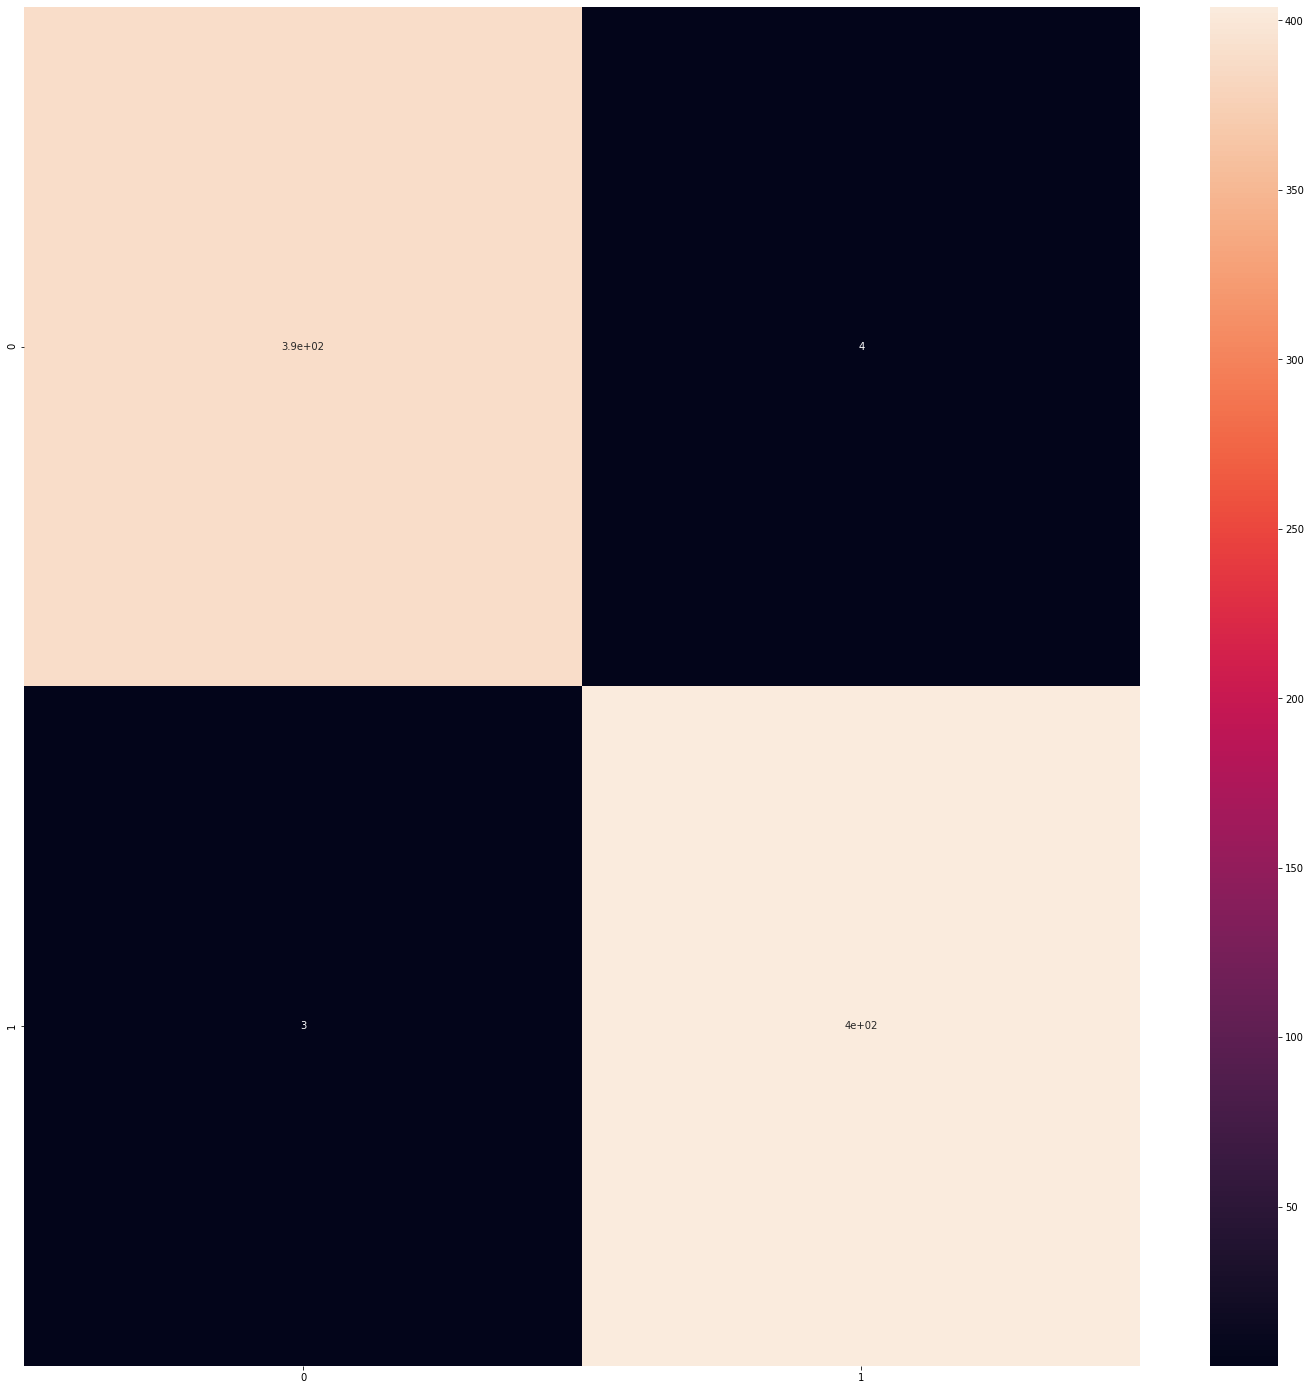

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_naive)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [22]:
import pickle
# save the model to disk
filename = 'NaiveB.sav'
pickle.dump(NaiveB, open(filename, 'wb'))

# #Decision Tree


In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,y_train)
y_dtc = dtc.predict(X_test)


In [65]:
accuracy = accuracy_score(y_test, y_dtc) # Dentre todas as classificações, quantas o modelo classificou corretamente? 
precision = precision_score(y_test, y_dtc) # Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas
recall = recall_score(y_test, y_dtc) #  dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas

f1 = f1_score(y_test, y_dtc) # média harmônica entre precisão e recall

print("Model Accuracy : ", accuracy)
print("Model Precision : ", precision)
print("Model Recall : ", recall)
print("Model F1 Score : ", f1)

Model Accuracy :  0.9975
Model Precision :  0.9975429975429976
Model Recall :  0.9975429975429976
Model F1 Score :  0.9975429975429976


<AxesSubplot:>

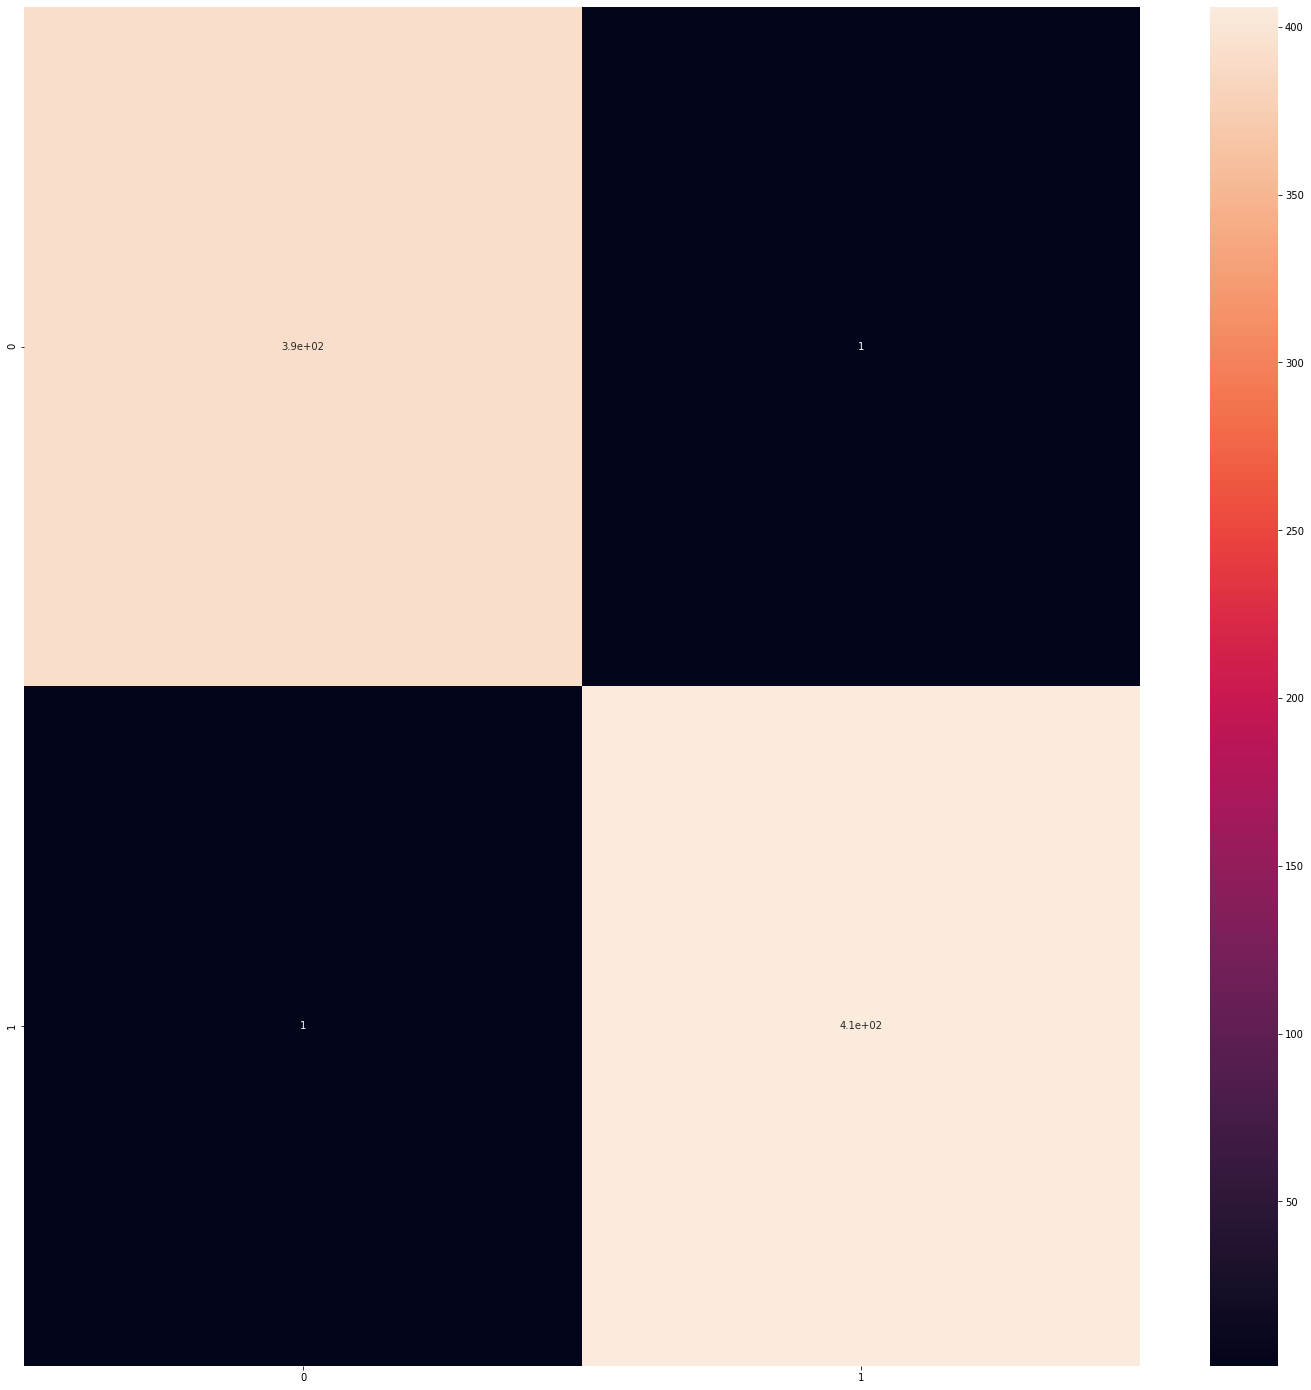

In [66]:
cm = confusion_matrix(y_test, y_dtc)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [27]:
# save the model to disk
filename = 'DecisionT.sav'
pickle.dump(dtc, open(filename, 'wb'))

# # Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)
y_log = logisticRegr.predict(X_test)


In [67]:
accuracy = accuracy_score(y_test, y_log) # Dentre todas as classificações, quantas o modelo classificou corretamente? 
precision = precision_score(y_test, y_log) # Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas
recall = recall_score(y_test, y_log) #  dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas

f1 = f1_score(y_test, y_log) # média harmônica entre precisão e recall

print("Model Accuracy : ", accuracy)
print("Model Precision : ", precision)
print("Model Recall : ", recall)
print("Model F1 Score : ", f1) 

Model Accuracy :  0.995
Model Precision :  0.995085995085995
Model Recall :  0.995085995085995
Model F1 Score :  0.995085995085995


<AxesSubplot:>

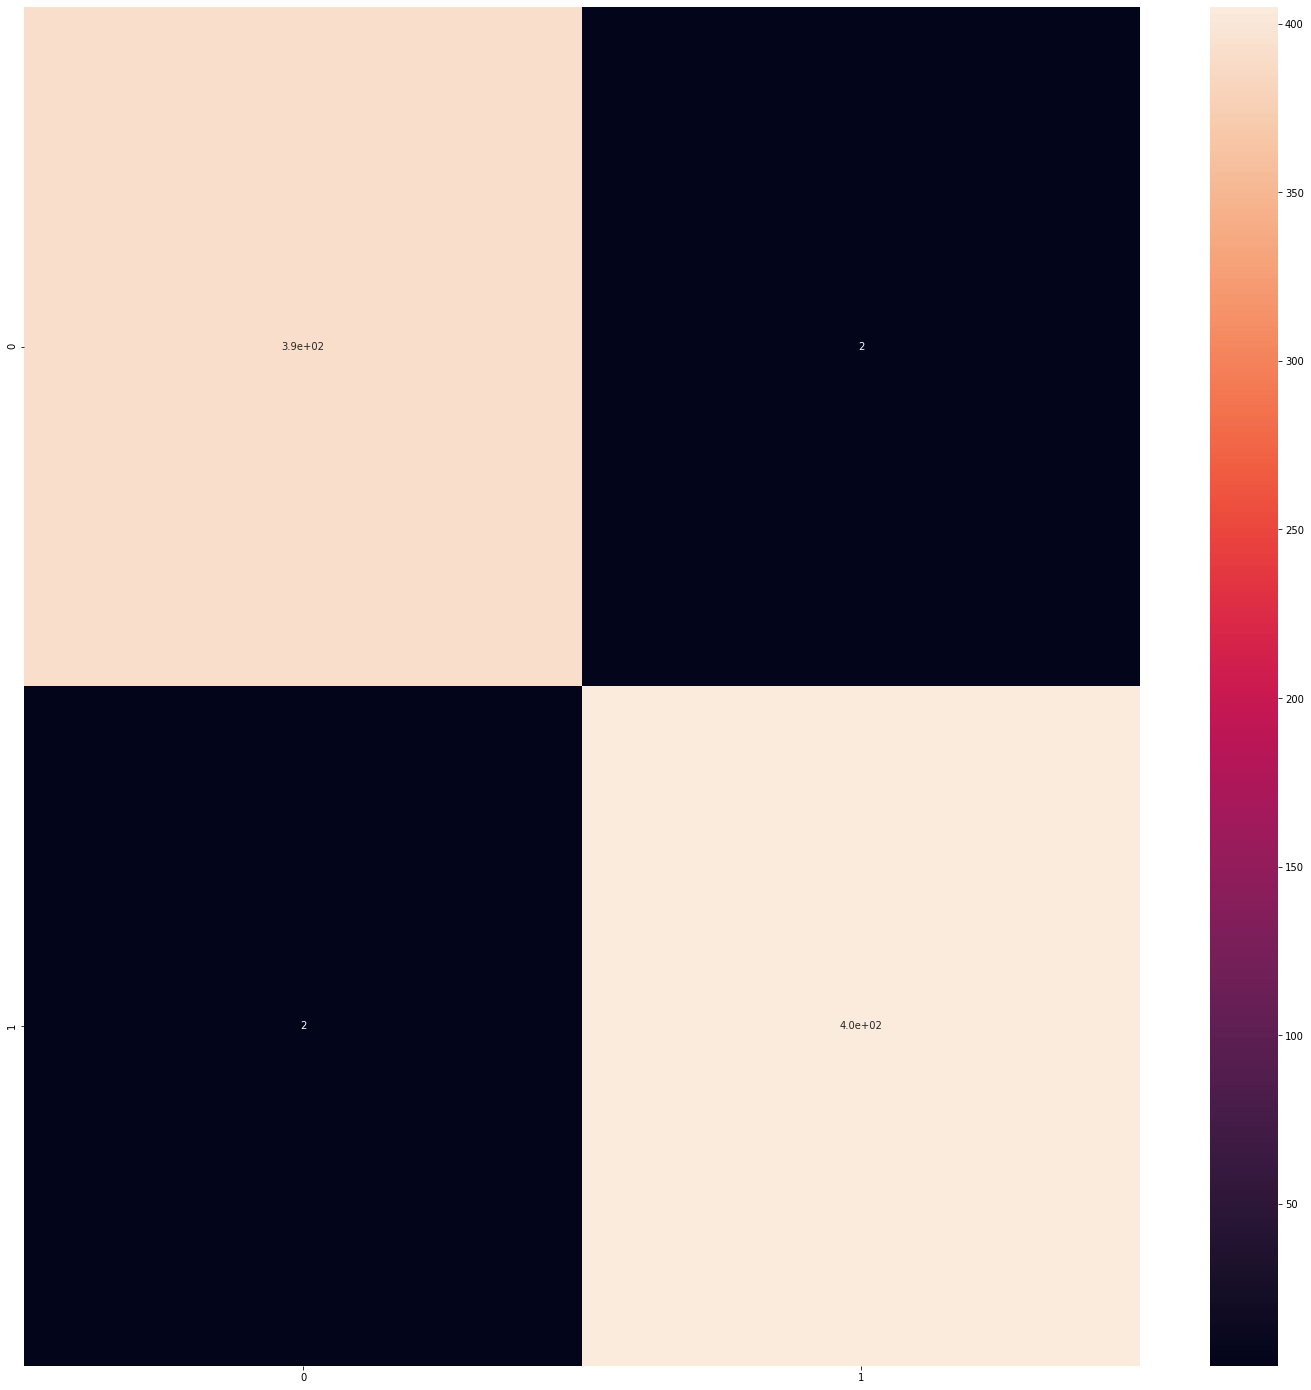

In [68]:
cm = confusion_matrix(y_test, y_log)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

# # Randon Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_rand = clf.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_rand) # Dentre todas as classificações, quantas o modelo classificou corretamente? 
precision = precision_score(y_test, y_rand) # Dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas
recall = recall_score(y_test, y_rand) #  dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas

f1 = f1_score(y_test, y_rand) # média harmônica entre precisão e recall

print("Model Accuracy : ", accuracy)
print("Model Precision : ", precision)
print("Model Recall : ", recall)
print("Model F1 Score : ", f1)

Model Accuracy :  0.9975
Model Precision :  0.9951100244498777
Model Recall :  1.0
Model F1 Score :  0.9975490196078431


<AxesSubplot:>

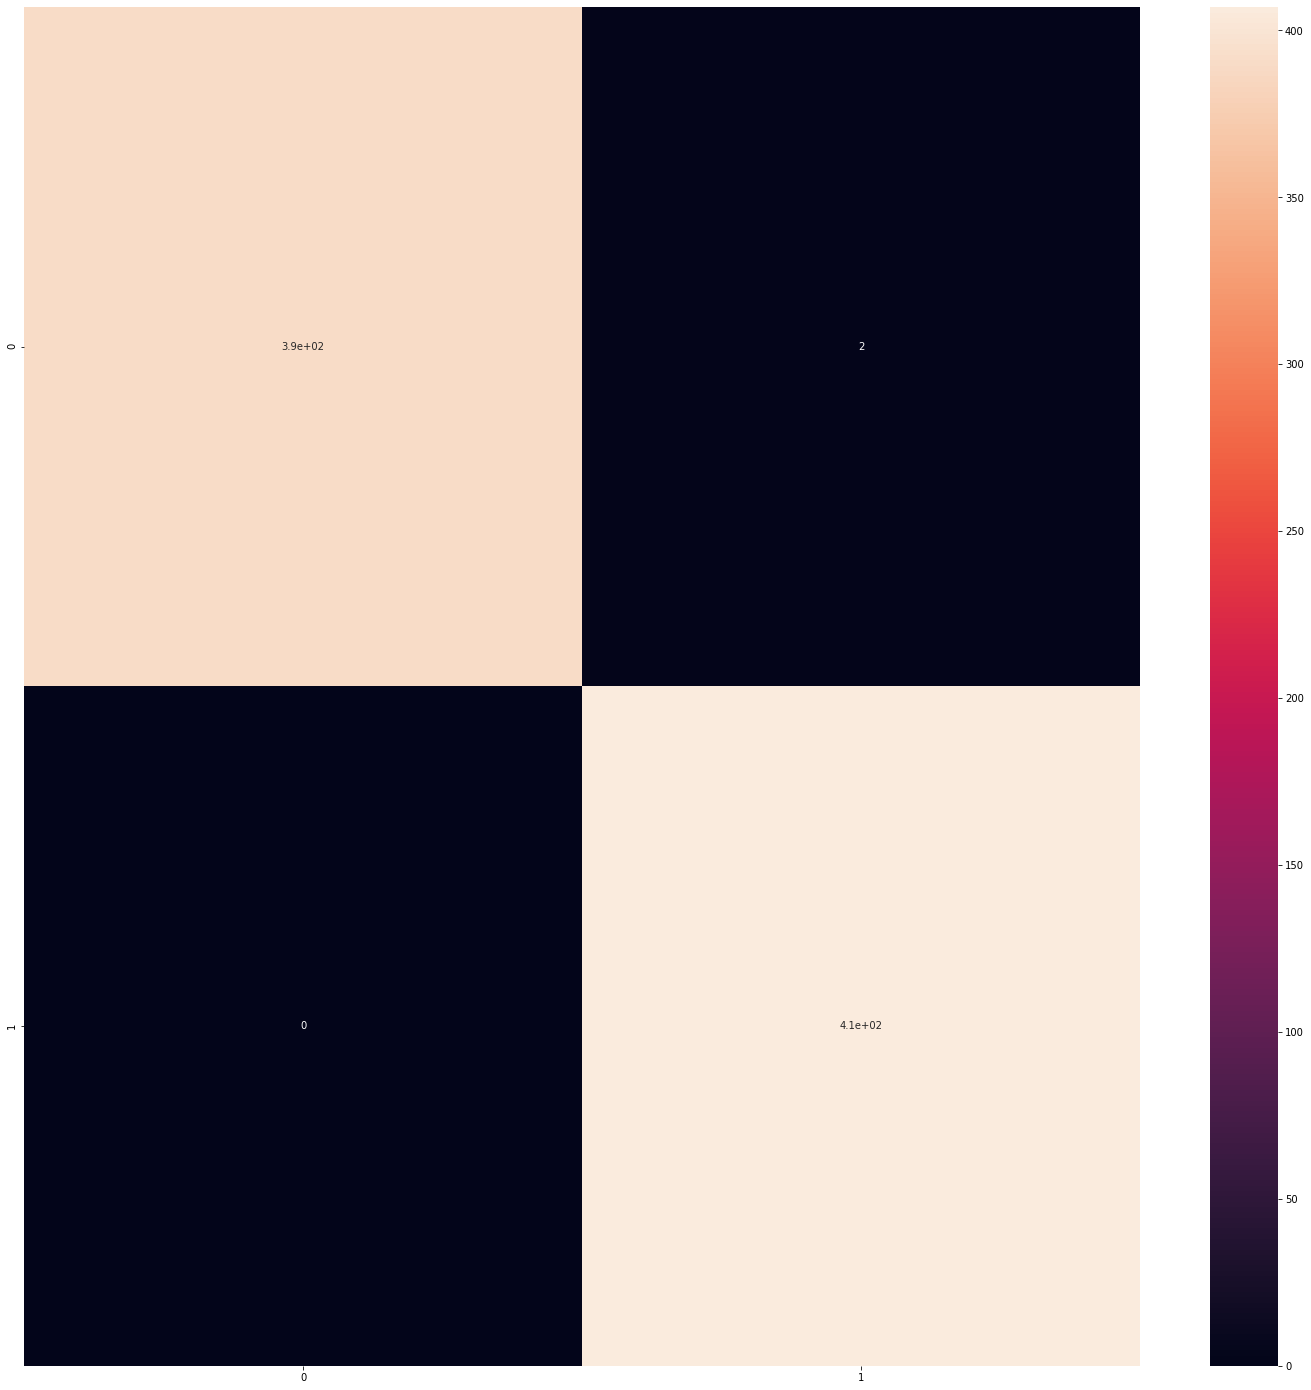

In [70]:
cm = confusion_matrix(y_test, y_rand)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)